# Basic model

In [36]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
#create known parameters 

weights =0.7
bias = 0.3 

start = 0 
end = 1
step = 0.02

X = torch.arange(start,end,step)
y = weights * X + bias


X[:10],y[:10], len(X),len(y)

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]),
 50,
 50)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=41)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [39]:
# print(f'y_train    :{y_train}'),X_train

In [40]:
def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test, 
                    test_label = y_test,
                    predictions = None):
## plot data  s is size
    plt.scatter(train_data,train_label, c='b',s=10, label = 'Training data') 

    plt.scatter(test_data,test_label, c ='green',s = 10, label= 'Testing data') 
    
    #prdiction           
    
    if predictions is not None:
        plt.scatter(test_data,predictions,c ='r', s = 10, label='Predictions')
        
    #show legends 
    plt.legend(prop={'size':10})

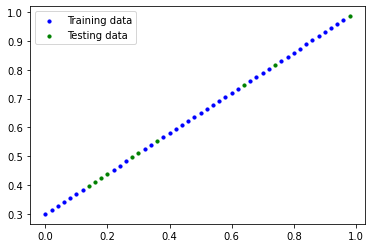

In [41]:
plot_predictions()

# Build Model 

In [42]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype= torch.float)) 
        self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype=torch.float))

        # forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias  # linear regression formula


 y = w * x + b 
 i is a tensor with the value x,y,b. we can compute derivative of y w.r.t the tensor that have required_grad set to True. It is called autograd
 

In [43]:
 
torch.manual_seed(42)
model_0= LinearRegressionModel()
model_0
#list(model_0.parameters())
# model_0.state_dict()

LinearRegressionModel()

## Prediction

In [44]:
# making prediction using torch.inference_mode()
#with torch.inference_mode(): # or we can use torch.no_grad()
with torch.inference_mode():
    y_preds = model_0(X_test)

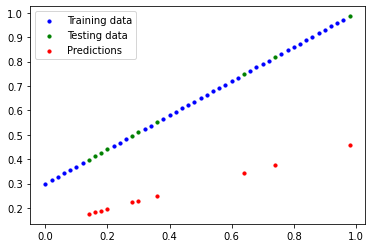

In [45]:
plot_predictions(predictions=y_preds) 

## Loss function and optimizer

In [46]:
## to measure how wrong outputs  are we will use loss function
# we will use optimizer to adjust parameter

# SETUP LOSS FUNCTION 
loss_fn = nn.L1Loss()

#SETUP OPTIMIZER(SGD)
# learning rate(lr) is a hyperparameter that defines how big or small
#     optimizer changes the poarameter

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


## Building a training loop (and a testing loop) in PyTorch


A couple of things we need in a training loop:





0. Loop through the data


1. Forward pass (his involves data moving through our models  forward()   functions) to make  predictions on data- also called foward propagation

2. calculate the loss (compare forward pass pretictions to ground truth      label)

3. Optimizer zero grad

4. Loss backward-move backwards through the network to calculate the gradients of each of the paremeters of our model with respect to
the loss (backpropagation)

5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent)



In [60]:
# An epoch is one loop through the data
epochs = 50

epochs_values = []
train_loss_values = []
test_loss_values = []

for i in range(epochs):
    model_0.train() # train mode in pytorch set all parameter that require gradients to require gradient
     # 1 forward pass
    y_preds = model_0(X_train)
        
    # 2 calculate the loss 
    train_loss = loss_fn(y_preds,y_train)
    print(f'Loss:{train_loss}')

    # 3 optimize zero grad
    optimizer.zero_grad()

    # 4 perform backpropogation on the loss with respect to the parameters of the model 
    train_loss.backward()

    # 5 step the optimizer(perform gradient descent )
    optimizer.step()
    ### Testing 
    model_0.eval() # turn off gradient tracking

Loss:0.011874581687152386
Loss:0.0114211430773139
Loss:0.010967711918056011
Loss:0.010515611618757248
Loss:0.010065347887575626
Loss:0.00961191114038229
Loss:0.009158475324511528
Loss:0.00870504043996334
Loss:0.008251601830124855
Loss:0.007798162754625082
Loss:0.007344729267060757
Loss:0.00689537962898612
Loss:0.006442372687160969
Loss:0.005988930352032185
Loss:0.005535495467483997
Loss:0.005082058720290661
Loss:0.004628624767065048
Loss:0.004175181500613689
Loss:0.003724071430042386
Loss:0.00328587437979877
Loss:0.0028278157114982605
Loss:0.0023758665192872286
Loss:0.001948375254869461
Loss:0.0018804117571562529
Loss:0.00507909432053566
Loss:0.007552578113973141
Loss:0.00507909432053566
Loss:0.007552578113973141
Loss:0.00507909432053566
Loss:0.007552578113973141
Loss:0.00507909432053566
Loss:0.007552578113973141
Loss:0.00507909432053566
Loss:0.007552578113973141
Loss:0.00507909432053566
Loss:0.007552578113973141
Loss:0.00507909432053566
Loss:0.007552578113973141
Loss:0.005079094320535

In [61]:
with torch.inference_mode(): 
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)

In [63]:
for i in range(epochs):
        if i % 10 == 0:
            print(f'epoch:{i} | train_loss:{train_loss} | test_lost:{test_loss}')

epoch:0 | train_loss:0.007552578113973141 | test_lost:0.0053551048040390015
epoch:10 | train_loss:0.007552578113973141 | test_lost:0.0053551048040390015
epoch:20 | train_loss:0.007552578113973141 | test_lost:0.0053551048040390015
epoch:30 | train_loss:0.007552578113973141 | test_lost:0.0053551048040390015
epoch:40 | train_loss:0.007552578113973141 | test_lost:0.0053551048040390015


In [68]:
model_0.state_dict

<bound method Module.state_dict of LinearRegressionModel()>

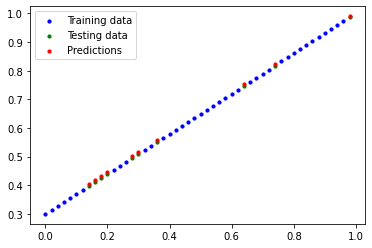

In [64]:
plot_predictions(predictions=test_pred)